In [1]:
!pip install pandas scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016.csv


In [6]:
df = pd.read_csv('KaggleV2-May-2016.csv')  # Replace with your file name
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [8]:
df = df.drop(['PatientId', 'AppointmentID'], axis=1)

In [9]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

In [10]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
df['ScheduledWeekday'] = df['ScheduledDay'].dt.dayofweek
df['AppointmentWeekday'] = df['AppointmentDay'].dt.dayofweek
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [12]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

In [13]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledWeekday,AppointmentWeekday,WaitingDays
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,4,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,4,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,4,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,4,-1


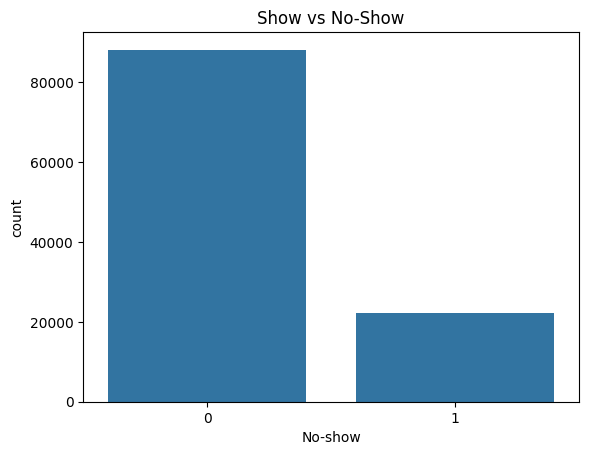

In [14]:
sns.countplot(x='No-show', data=df)
plt.title('Show vs No-Show')
plt.show()

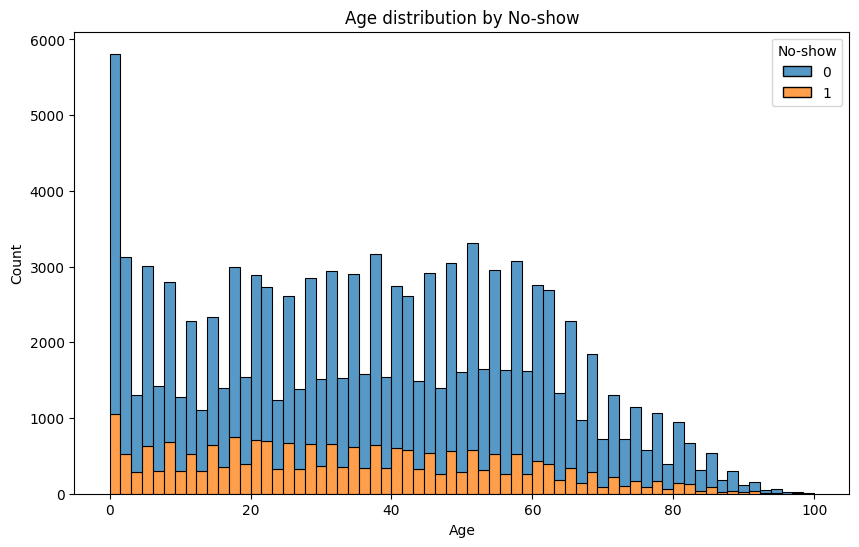

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='No-show', multiple="stack")
plt.title('Age distribution by No-show')
plt.show()

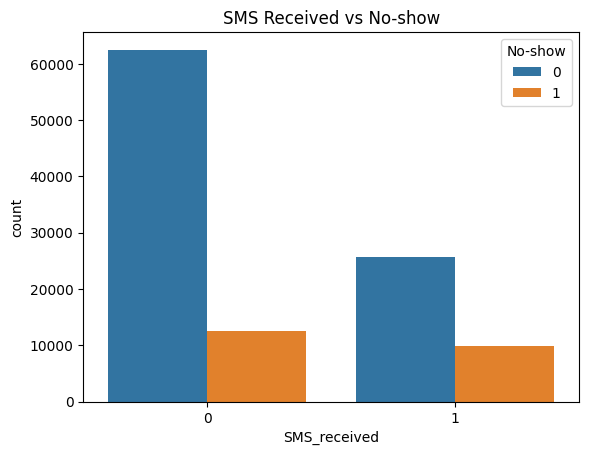

In [16]:
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('SMS Received vs No-show')
plt.show()

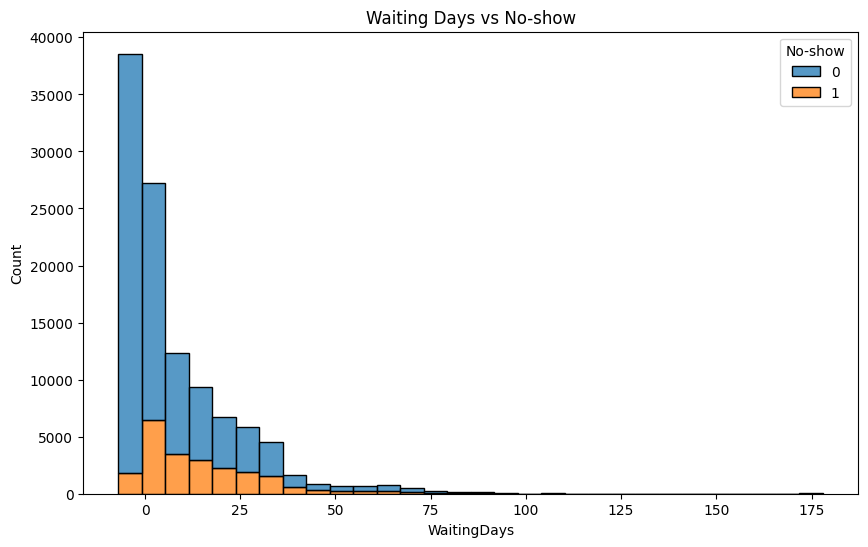

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(x='WaitingDays', hue='No-show', data=df, multiple="stack", bins=30)
plt.title('Waiting Days vs No-show')
plt.show()

In [19]:
features = ['Age', 'SMS_received', 'WaitingDays', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'AppointmentWeekday']
X = df[features]
y = df['No-show']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [24]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7999004705030763


In [25]:
print(confusion_matrix(y_test, y_pred))

[[17680     4]
 [ 4419     1]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17684
           1       0.20      0.00      0.00      4420

    accuracy                           0.80     22104
   macro avg       0.50      0.50      0.44     22104
weighted avg       0.68      0.80      0.71     22104



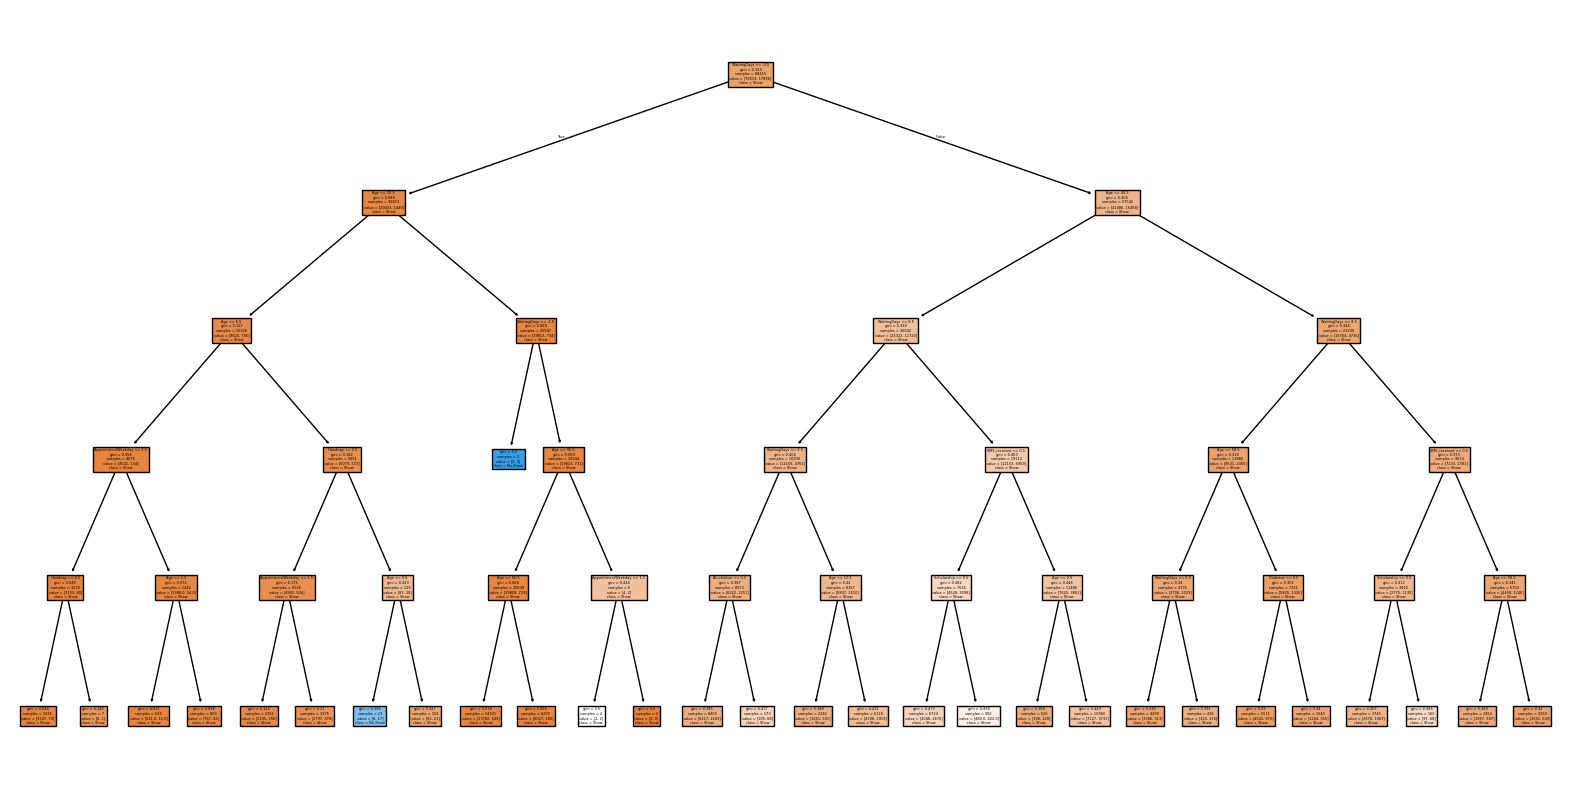

In [27]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=features, class_names=['Show', 'No-Show'], filled=True)
plt.show()

In [28]:
df['Prediction'] = model.predict(X)

In [29]:
df.to_csv('healthcare_no_show_predictions.csv', index=False)

In [30]:
files.download('healthcare_no_show_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>